<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r9-i2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pickle

Importing Dataset from GitHub

Train Data

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-malicious-n-0-15-m-1-r9.csv?token=AKVFSOBYZC4G6LXFHKRUXSS63I5X4')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-malicious-n-0-15-m-11-r9.csv?token=AKVFSOB5GJ644WPZILMYKES63I5X6')

df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-malicious-n-0-4-m-1-r9.csv?token=AKVFSOFKC5MUKGRYRBP5A3263I5YC')
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-malicious-n-0-4-m-11-r9.csv?token=AKVFSOHT4LJZBLILXTMUSUC63I5YE')

df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-malicious-n-0-6-m-1-r9.csv?token=AKVFSODFAXDKEJN3UVWPVN263I5YG')
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-malicious-n-0-6-m-11-r9.csv?token=AKVFSOHC7DIPJ45FEIXU4WC63I5YK')

df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-malicious-n-0-9-m-1-r9.csv?token=AKVFSOFZ2WNJL46PEBZEBQS63I5YO')
df8 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-malicious-n-0-9-m-11-r9.csv?token=AKVFSOF2ZLFCI6ME5XUSMWK63I5YS')

df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-normal-n-0-15-r9.csv?token=AKVFSOHOK4Z2QMGCARXW6C263I5YU')
df10 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-normal-n-0-4-r9.csv?token=AKVFSOEP3BLBVNCYHOPZSXC63I5YY')
df11 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-normal-n-0-6-r9.csv?token=AKVFSODVPMKNCQJDQV2RUAC63I5Y6')
df12 = pd.read_csv('http://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-normal-n-0-9-r9.csv?token=AKVFSOH25STVHOUWKX2CRCK63I5ZE')

In [0]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)
print(df7.shape)
print(df8.shape)
print(df9.shape)
print(df10.shape)
print(df11.shape)
print(df12.shape)

(60740, 26)
(64099, 26)
(58232, 26)
(62112, 26)
(57998, 26)
(61950, 26)
(110505, 26)
(114054, 26)
(36185, 26)
(33628, 26)
(33707, 26)
(85934, 26)


In [0]:
df = df1.append(df2, ignore_index=True,sort=False)
df = df.append(df3, ignore_index=True,sort=False)
df = df.append(df4, ignore_index=True,sort=False)
df = df.append(df5, ignore_index=True,sort=False)
df = df.append(df6, ignore_index=True,sort=False)
df = df.append(df7, ignore_index=True,sort=False)
df = df.append(df8, ignore_index=True,sort=False)
df = df.append(df9, ignore_index=True,sort=False)
df = df.append(df10, ignore_index=True,sort=False)
df = df.append(df11, ignore_index=True,sort=False)
df = df.append(df12, ignore_index=True,sort=False)

df = df.sort_values('timestamp')
df.to_csv('fft-r9-train.csv',index=False)

In [0]:
df = pd.read_csv('fft-r9-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,7,2,0,1,1,4,3,9,9,9,23,7,2,3,0,0.000000,4,70,1,70,70,0,8,3,27,1
1,7,2,0,1,1,4,3,9,9,9,23,7,2,3,0,0.000000,4,88,1,88,88,0,8,3,27,0
2,7,2,0,1,1,4,3,9,9,9,23,7,3,3,0,0.000000,4,86,1,86,86,0,12,3,27,0
3,70,0,3,4,1,1,5,17,23,7,9,9,2,3,3,1.000000,16,69,2,70,138,0,8,20,340,1
4,71,0,3,4,2,2,5,17,23,7,9,9,2,3,3,1.000000,17,68,3,70,204,0,32,20,340,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779139,3276936,4,2,6,4,2,3,9,27,11,24,8,30095,3,2,0.666667,33,5,10,14,50,8,1444560,18,162,0
779140,3276943,4,2,6,5,3,3,9,27,11,24,8,30095,3,2,0.666667,40,4,11,14,44,8,2708550,18,162,0
779141,3276944,4,2,2,1,4,3,10,27,11,24,8,30096,3,2,0.666667,40,3,12,14,36,8,240768,6,60,0
779142,3276988,2,4,4,1,1,5,17,24,8,15,15,30096,4,1,0.250000,8,2,13,14,26,8,120384,20,340,0


In [0]:
df.shape

(779144, 26)

Test Data

In [0]:
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-malicious-n-0-15-m-12-r9.csv?token=AKVFSOBOHTVG3MJMJANN6WK63I6C2')
df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-malicious-n-0-15-m-7-r9.csv?token=AKVFSOB6G5XYPI2M2MYYVWK63I6C4')
df15 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-malicious-n-0-4-m-12-r9.csv?token=AKVFSOFKWAFM52ARWFNRYAS63I6C6')
df16 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-malicious-n-0-4-m-7-r9.csv?token=AKVFSODAQD7CE6W6GUDPTZC63I6DA')
df17 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-malicious-n-0-6-m-12-r9.csv?token=AKVFSOFBWSLMJUQVAPKAEX263I6DE')
df18 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-malicious-n-0-6-m-7-r9.csv?token=AKVFSOGY6QHT5NN24KL7E7C63I6DI')
df19 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-malicious-n-0-9-m-12-r9.csv?token=AKVFSOALONLIOJZTZCXCUTC63I6DM')
df20 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-malicious-n-0-9-m-7-r9.csv?token=AKVFSOHCIKUWUJA7HJX3UK263I6DO')

In [0]:
print(df13.shape)
print(df14.shape)
print(df15.shape)
print(df16.shape)
print(df17.shape)
print(df18.shape)
print(df19.shape)
print(df20.shape)

(56360, 26)
(52835, 26)
(53293, 26)
(50604, 26)
(53066, 26)
(50369, 26)
(105301, 26)
(102607, 26)


In [0]:
df5

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,132,2,4,4,1,1,5,17,24,8,6,6,4,3,1,0.333333,8,43,1,43,43,8,16,20,340,0
1,133,2,4,4,2,2,5,17,24,8,6,6,4,3,1,0.333333,9,42,2,43,84,8,64,20,340,0
2,134,2,4,4,3,2,5,17,24,8,6,6,4,3,1,0.333333,10,41,3,43,123,8,96,20,340,0
3,135,2,4,4,4,2,5,17,24,8,6,6,4,3,1,0.333333,11,40,4,43,160,8,128,20,340,0
4,139,2,4,4,5,3,5,17,24,8,6,6,4,3,1,0.333333,15,39,5,43,195,8,240,20,340,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57993,3265456,4,2,4,1,1,5,17,27,11,0,0,30080,5,2,0.400000,12,5,14,18,70,8,120320,20,340,0
57994,3265458,4,2,4,2,2,5,17,27,11,0,0,30080,5,2,0.400000,14,4,15,18,60,8,481280,20,340,0
57995,3265459,4,2,4,3,2,5,17,27,11,0,0,30080,5,2,0.400000,15,3,16,18,48,8,721920,20,340,0
57996,3265460,4,2,4,4,2,5,17,27,11,0,0,30080,5,2,0.400000,16,2,17,18,34,8,962560,20,340,0


Processing

In [0]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
port_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [0]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
outport,1.000000,-0.384408,0.162525,0.030403,-0.046111,-0.135974,-0.111099,0.039730,0.282002,-0.229235,-0.559488,0.061157,-0.091151,-0.087766,-0.132278,-0.109103,0.586524,0.082376,0.031781,-0.066750,-0.043720
inport,-0.384408,1.000000,-0.203814,0.003061,-0.004649,0.471201,0.383405,0.021422,0.172238,0.384823,0.545313,-0.196724,-0.051262,-0.014621,-0.048709,-0.048515,0.433802,-0.053536,0.197366,0.368669,-0.059902
cache_coherence_type,0.162525,-0.203814,1.000000,0.220725,-0.334722,-0.262567,-0.282445,0.033873,-0.111981,-0.071005,-0.061395,-0.172127,0.030707,-0.029803,0.000668,0.002553,-0.027593,0.296210,0.648448,0.108831,0.001863
flit_id,0.030403,0.003061,0.220725,1.000000,-0.016699,0.208800,0.187382,0.001861,0.043316,0.021871,-0.005883,0.392548,-0.022189,0.023404,0.000898,0.001635,0.032601,0.649959,0.353582,0.290519,-0.000939
flit_type,-0.046111,-0.004649,-0.334722,-0.016699,1.000000,-0.316628,-0.284149,-0.002851,-0.065691,-0.033169,0.008920,0.374663,-0.037502,0.036879,-0.000461,-0.000832,-0.049451,0.141908,-0.536188,-0.440552,0.001433
vnet,-0.135974,0.471201,-0.262567,0.208800,-0.316628,1.000000,0.980009,-0.027451,0.321829,0.164416,0.140167,-0.404300,-0.033499,0.035392,0.001399,-0.004339,0.263840,-0.049918,0.564288,0.925133,0.003858
vc,-0.111099,0.383405,-0.282445,0.187382,-0.284149,0.980009,1.000000,-0.032593,0.280233,0.077483,0.050708,-0.398193,-0.023749,0.049603,0.019114,0.011555,0.208274,-0.063673,0.531509,0.916888,0.010878
traversal_id,0.039730,0.021422,0.033873,0.001861,-0.002851,-0.027451,-0.032593,1.000000,0.011569,0.008166,-0.004508,0.028876,0.123253,0.124211,0.182956,0.126866,0.061196,0.541970,0.007324,-0.018433,-0.265437
hop_count,0.282002,0.172238,-0.111981,0.043316,-0.065691,0.321829,0.280233,0.011569,1.000000,0.560295,0.050760,0.011851,-0.144230,-0.114768,-0.191483,-0.164061,0.515067,-0.026592,0.158093,0.270027,-0.024639
current_hop,-0.229235,0.384823,-0.071005,0.021871,-0.033169,0.164416,0.077483,0.008166,0.560295,1.000000,0.776531,0.248955,-0.079290,-0.097306,-0.130562,-0.109895,0.154938,-0.013916,0.068963,0.098751,-0.008315


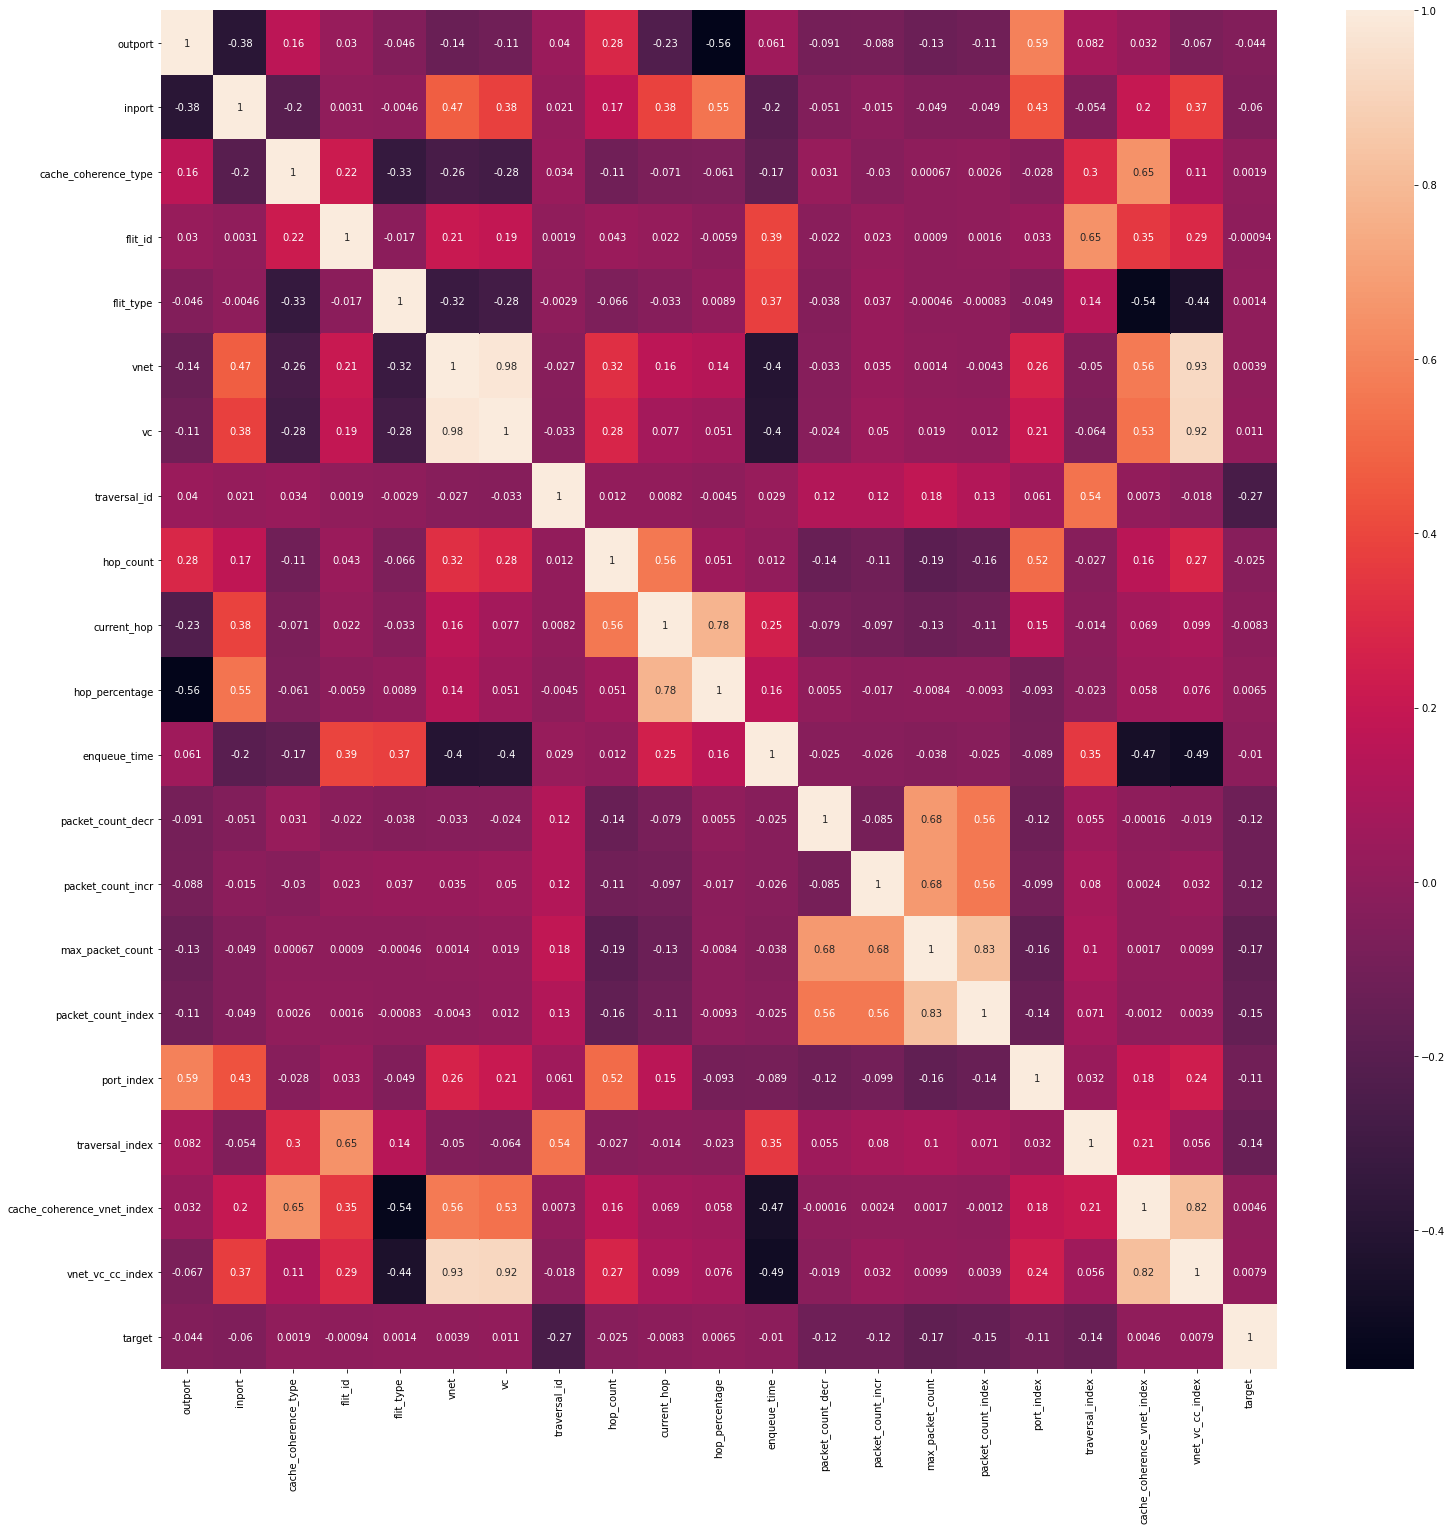

In [0]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [0]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [0]:
columns_to_drop = find_correlation(df.drop(columns=['target']))
columns_to_drop

['vnet_vc_cc_index', 'vnet']

In [0]:
#df = df.drop(columns=[''])

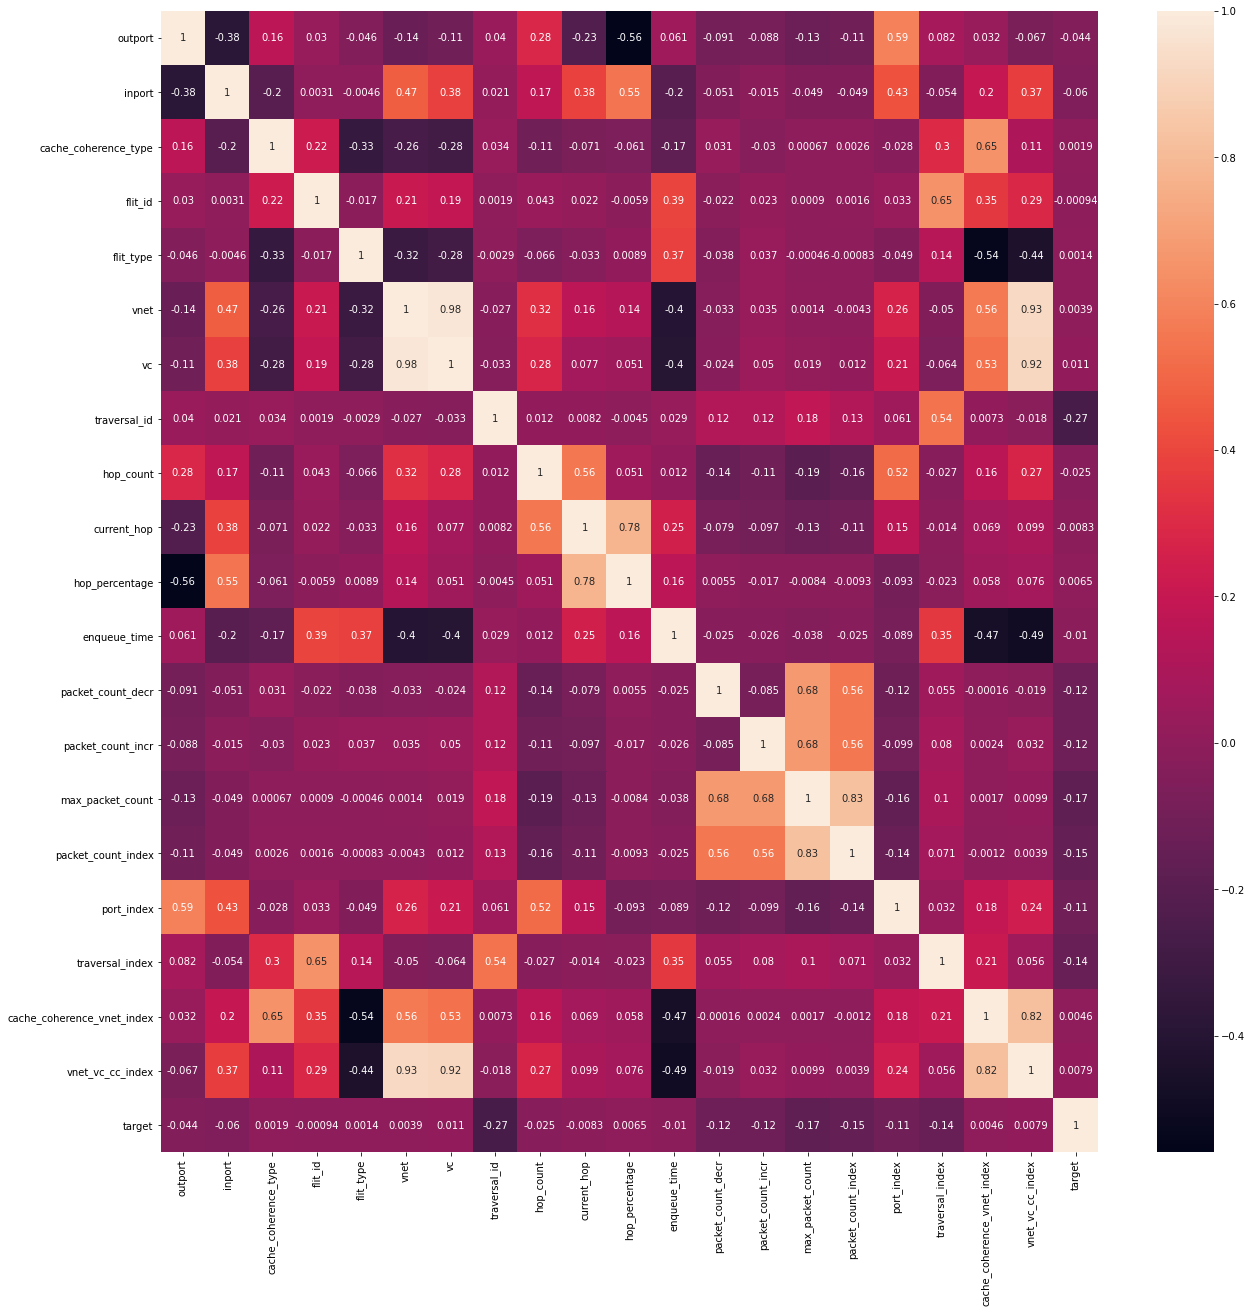

In [0]:
plt.figure(figsize=(21,21))
sns.heatmap(df.corr(), annot = True)
plt.show()

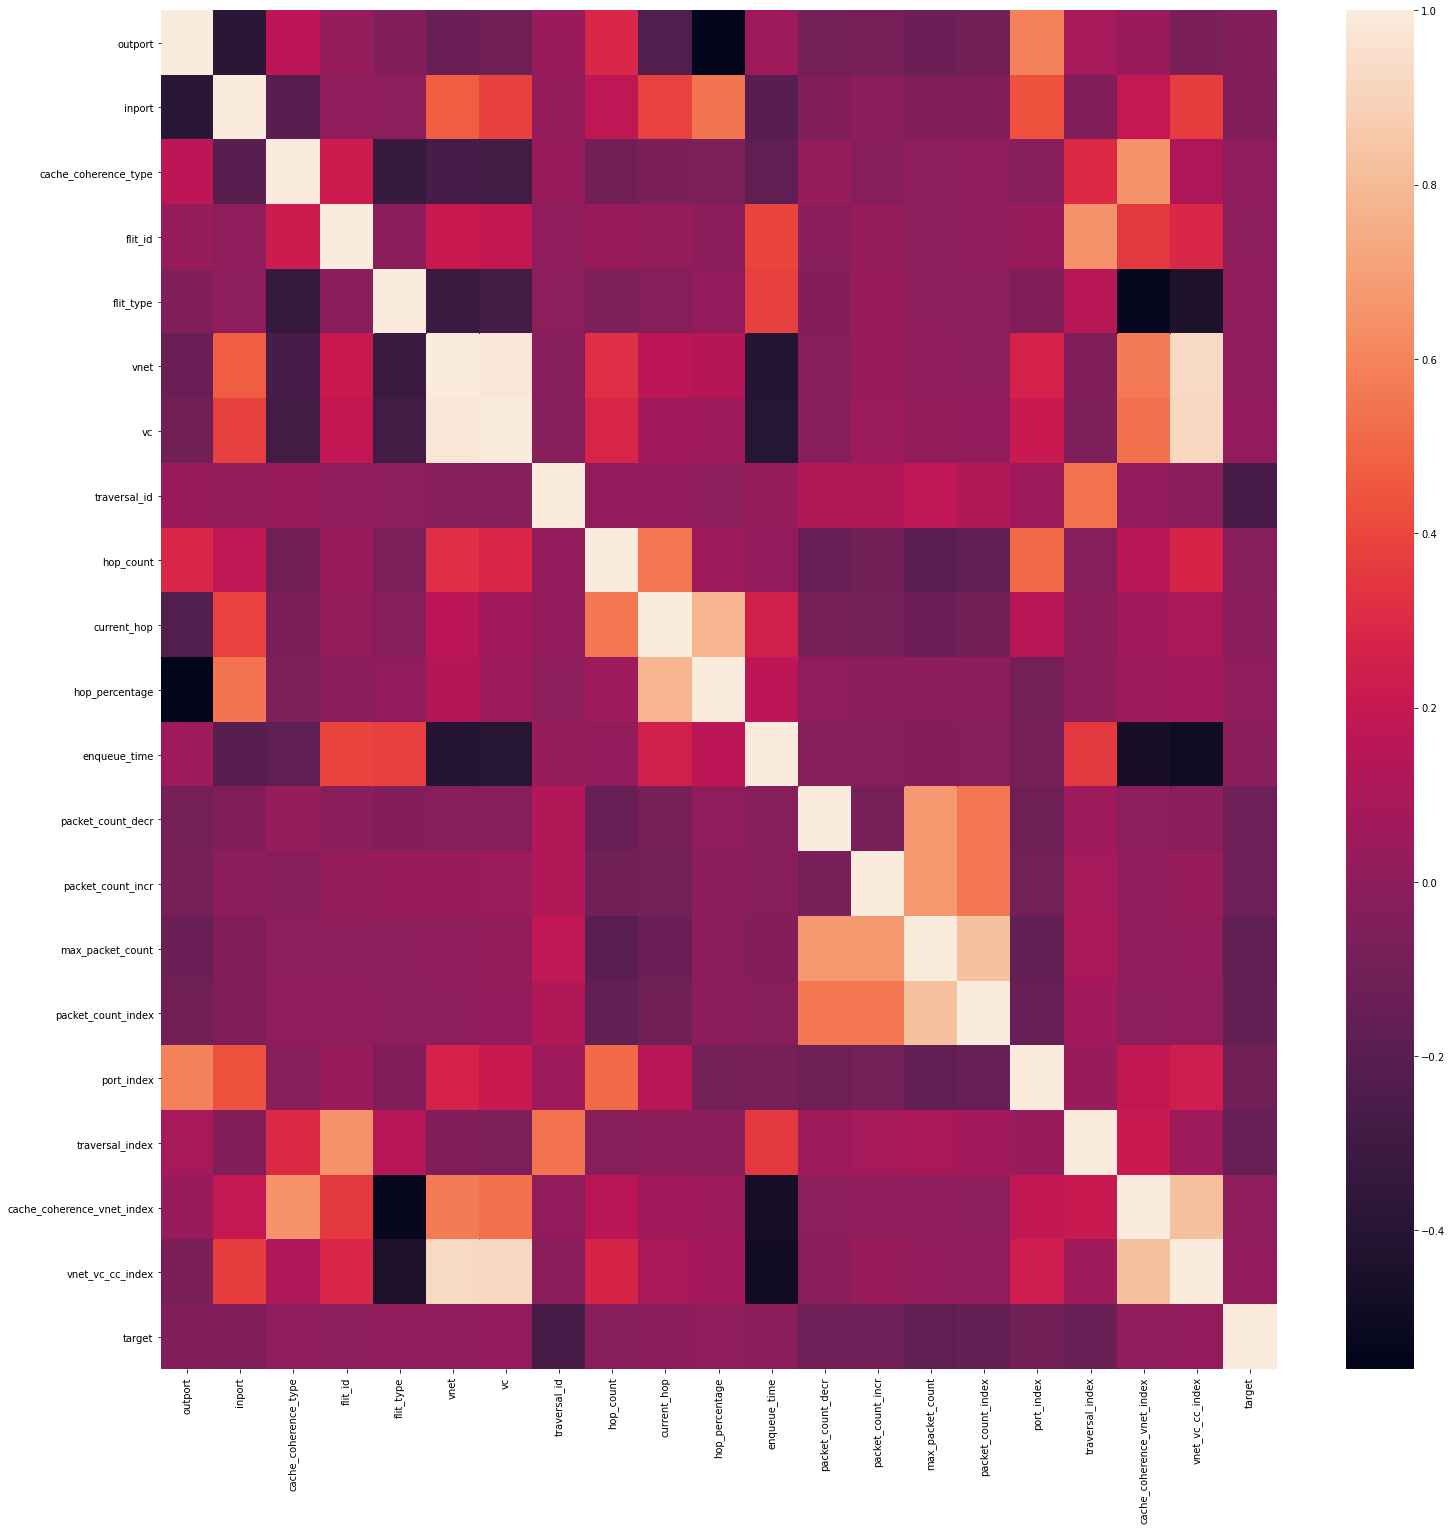

In [0]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr())
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_Y = df['target']

In [0]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index
0,0.5,0.00,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.6,0.00,0.000000,0.000000,0.372973,0.000000,0.372973,0.007894,0.000000,0.000000,0.000000,0.000000
1,0.5,0.00,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.6,0.00,0.000000,0.000000,0.470270,0.000000,0.470270,0.009953,0.000000,0.000000,0.000000,0.000000
2,0.5,0.00,0.000000,0.00,1.000000,0.0,0.000000,0.000033,0.6,0.00,0.000000,0.000000,0.459459,0.000000,0.459459,0.009724,0.000000,0.000001,0.000000,0.000000
3,0.0,0.75,0.500000,0.00,0.000000,1.0,0.888889,0.000000,0.6,0.75,1.000000,0.187500,0.367568,0.005405,0.372973,0.015673,0.000000,0.000000,0.944444,0.939940
4,0.0,0.75,0.500000,0.25,0.333333,1.0,0.888889,0.000000,0.6,0.75,1.000000,0.203125,0.362162,0.010811,0.372973,0.023224,0.000000,0.000009,0.944444,0.939940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779139,1.0,0.50,0.833333,0.75,0.333333,0.0,0.000000,0.999967,0.6,0.50,0.666667,0.453125,0.021622,0.048649,0.070270,0.005606,0.666667,0.533332,0.833333,0.405405
779140,1.0,0.50,0.833333,1.00,0.666667,0.0,0.000000,0.999967,0.6,0.50,0.666667,0.562500,0.016216,0.054054,0.070270,0.004919,0.666667,1.000000,0.833333,0.405405
779141,1.0,0.50,0.166667,0.00,1.000000,0.0,0.111111,1.000000,0.6,0.50,0.666667,0.562500,0.010811,0.059459,0.070270,0.004004,0.666667,0.088889,0.166667,0.099099
779142,0.5,1.00,0.500000,0.00,0.000000,1.0,0.888889,1.000000,0.8,0.25,0.250000,0.062500,0.005405,0.064865,0.070270,0.002860,0.666667,0.044443,0.944444,0.939940


In [0]:
train_X[train_X.duplicated()].shape

(3202, 20)

In [0]:
test_X = df13.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y = df13['target']
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
print(test_X[test_X.duplicated()].shape)
test_X

(0, 20)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index
0,0.50,1.00,0.500000,0.00,0.000000,1.0,0.888889,0.000000,0.75,0.25,0.25,0.065574,0.233333,0.000000,0.233333,0.007527,1.000,0.000000,0.944444,0.939940
1,0.50,1.00,0.500000,0.25,0.333333,1.0,0.888889,0.000000,0.75,0.25,0.25,0.081967,0.225000,0.008333,0.233333,0.014785,1.000,0.000018,0.944444,0.939940
2,0.50,1.00,0.500000,0.50,0.333333,1.0,0.888889,0.000000,0.75,0.25,0.25,0.098361,0.216667,0.016667,0.233333,0.021505,1.000,0.000030,0.944444,0.939940
3,0.50,1.00,0.500000,0.75,0.333333,1.0,0.888889,0.000000,0.75,0.25,0.25,0.114754,0.208333,0.025000,0.233333,0.027688,1.000,0.000041,0.944444,0.939940
4,0.50,1.00,0.500000,1.00,0.666667,1.0,0.888889,0.000000,0.75,0.25,0.25,0.180328,0.200000,0.033333,0.233333,0.033333,1.000,0.000083,0.944444,0.939940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56355,0.75,0.25,0.666667,0.25,0.333333,0.0,0.000000,0.999967,1.00,1.00,0.80,0.311475,0.033333,0.008333,0.041667,0.002419,0.375,0.222277,0.666667,0.324324
56356,0.75,0.25,0.666667,0.50,0.333333,0.0,0.000000,0.999967,1.00,1.00,0.80,0.426230,0.025000,0.016667,0.041667,0.002957,0.375,0.333418,0.666667,0.324324
56357,0.75,0.25,0.666667,0.75,0.333333,0.0,0.000000,0.999967,1.00,1.00,0.80,0.540984,0.016667,0.025000,0.041667,0.002957,0.375,0.444559,0.666667,0.324324
56358,0.75,0.25,0.666667,1.00,0.666667,0.0,0.000000,0.999967,1.00,1.00,0.80,0.655738,0.008333,0.033333,0.041667,0.002419,0.375,0.833554,0.666667,0.324324


In [0]:
test_X1 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y1 = df14['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)

(0, 20)


In [0]:
test_X2 = df15.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y2 = df15['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)

(0, 20)


In [0]:
test_X3 = df16.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y3 = df16['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)

(0, 20)


In [0]:
test_X4 = df17.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y4 = df17['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)

(0, 20)


In [0]:
test_X5 = df18.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y5 = df18['target']
x = test_X5.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X5.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X5 = pd.DataFrame(x_scaled)
test_X5.columns = columns
print(test_X5[test_X5.duplicated()].shape)

(0, 20)


In [0]:
test_X6 = df19.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y6 = df19['target']
x = test_X6.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X6.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X6 = pd.DataFrame(x_scaled)
test_X6.columns = columns
print(test_X6[test_X6.duplicated()].shape)

(0, 20)


In [0]:
test_X7 = df20.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y7 = df20['target']
x = test_X7.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X7.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X7 = pd.DataFrame(x_scaled)
test_X7.columns = columns
print(test_X7[test_X7.duplicated()].shape)

(0, 20)


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

Labels

1.   0 -  malicious
2.   1 -  good



In [0]:
train_Y = df['target']
train_Y.value_counts()

0    589690
1    189454
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                         Specs        Score
7                 traversal_id  7258.233605
14            max_packet_count  2389.897947
17             traversal_index  2297.954087
15          packet_count_index  2238.423545
16                  port_index  1929.915790
13           packet_count_incr  1199.972375
12           packet_count_decr  1189.941331
1                       inport   434.931276
0                      outport   281.509834
8                    hop_count    35.822274
6                           vc    32.774697
10              hop_percentage     8.493683
19            vnet_vc_cc_index     7.137131
11                enqueue_time     6.202219
5                         vnet     5.844969
9                  current_hop     4.652457
18  cache_coherence_vnet_index     1.334186


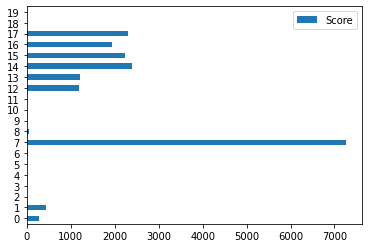

In [0]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [0]:
dt = DecisionTreeClassifier(max_depth=20,max_features=20,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=20, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
pickle.dump(dt, open("dt-r9.pickle.dat", 'wb'))

In [0]:
y_pred_dt= dt.predict(X_test)

In [0]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 93.62393011559163
Test Prediction Score 92.65990284221807


In [0]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X5)
dt_score_test = accuracy_score(test_Y5,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X6)
dt_score_test = accuracy_score(test_Y6,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X7)
dt_score_test = accuracy_score(test_Y7,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 94.58303761533003
Test Prediction Score 94.83675593829848
Test Prediction Score 95.01998386279624
Test Prediction Score 95.71377756699076
Test Prediction Score 94.74051181547507
Test Prediction Score 94.68919375012408
Test Prediction Score 89.60123835481144
Test Prediction Score 89.64690518190767


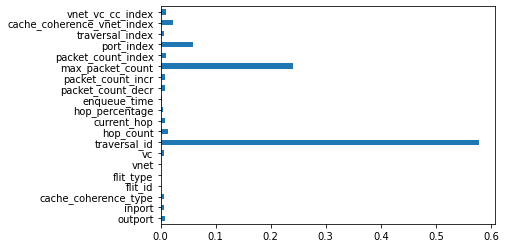

In [0]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

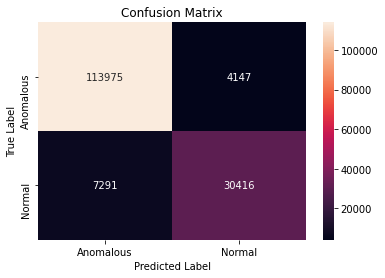

In [0]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95    118122
           1       0.88      0.81      0.84     37707

    accuracy                           0.93    155829
   macro avg       0.91      0.89      0.90    155829
weighted avg       0.93      0.93      0.93    155829



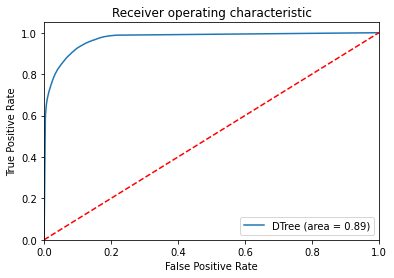

In [0]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

XGB Classifier

In [0]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [0]:
xgbc = XGBClassifier(max_depth=20,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
pickle.dump(xgbc, open("xgbc-r9.pickle.dat", 'wb'))

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [67]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.99310140137811
Test Prediction Score 99.66694261016885


In [68]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X5)
xgbc_score_test = accuracy_score(test_Y5,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X6)
xgbc_score_test = accuracy_score(test_Y6,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X7)
xgbc_score_test = accuracy_score(test_Y7,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 97.99680624556423
Test Prediction Score 97.10797766631968
Test Prediction Score 97.33173212241758
Test Prediction Score 97.28282349221405
Test Prediction Score 96.85109109410922
Test Prediction Score 96.71027814727312
Test Prediction Score 91.19571514040702
Test Prediction Score 91.60681045152866


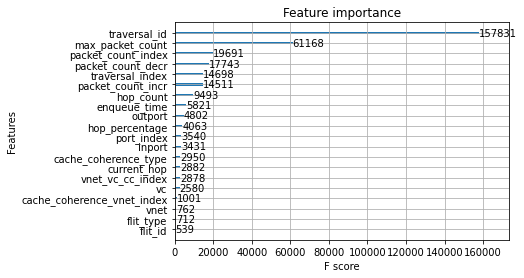

In [69]:
plot_importance(xgbc)
plt.show()

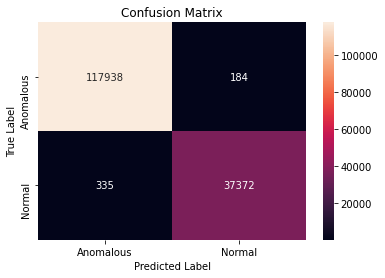

In [70]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [71]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    118122
           1       1.00      0.99      0.99     37707

    accuracy                           1.00    155829
   macro avg       1.00      0.99      1.00    155829
weighted avg       1.00      1.00      1.00    155829



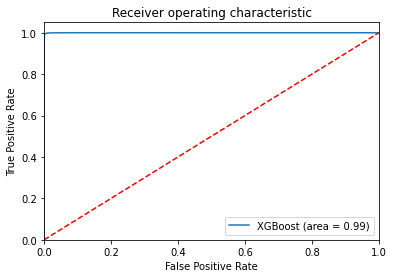

In [72]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()